# City of Toronto Bicycle Network Data

The Cycling Network dataset from the City of Toronto provides geospatial data on existing, planned, and proposed cycling infrastructure across the city. It includes detailed information about bike lanes, multi-use trails, and shared roadways, with = installation year, street names, road classification, and geometry. This dataset supports urban planning, transportation analysis, and cycling route visualization.

## Setup Notebook

In [4]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from IPython.display import display

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import City of Toronto Cycling Network GeoJson Data

This GeoJSON file contains 1,464 rows, each representing a segment of Toronto's cycling network.

In [7]:
# Import dataset as a GeoDataFrame
bicycle_data = gpd.read_file('cycling-network - 4326.geojson')

# View GeoDataFrame
bicycle_data.head()

_id  OBJECTID  SEGMENT_ID  INSTALLED  UPGRADED PRE_AMALGAMATION  \
0    1         1           1       2001      2021                    
1    2         2           2       2001      2009                    
2    3         3           3       2001      2011                    
3    4         4           4       2001      2011                    
4    5         5           5       2001      2012                    

                       STREET_NAME                 FROM_STREET  \
0                      Kilbarry Rd               Highbourne Rd   
1  Martin Goodman / Waterfront Trl           Lake Shore Blvd W   
2      Gatineau Hydro Corridor Trl                Givendale Rd   
3             G Ross Lord Park Trl                 Dufferin St   
4              Etobicoke Creek Trl  Etobicoke Creek Trl Branch   

                     TO_STREET ROADCLASS  ...             INFRA_HIGHORDER  \
0                  Oriole Pkwy            ...       Sharrows - Wayfinding   
1    Martin Goodman Trl Branch            ...             Multi-Use Trail   
2                   Kennedy Rd            ...             Multi-Use Trail   
3  G Ross Lord Park Trl Branch            ...             Multi-Use Trail   
4               Forty Third St            ...  Multi-Use Trail - Entrance   

  SEPA_HIGHORDER SEPB_HIGHORDER ORIG_HIGHORDER BYLAWED EDITOR  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               

       LAST_EDIT_DATE UPGRADE_DESCRIPTION CONVERTED  \
0 2024-06-11 16:40:31                          2007   
1 2024-06-11 16:40:31                                 
2 2024-06-11 16:40:31                                 
3 2024-06-11 16:40:31                                 
4 2024-06-11 16:40:31                                 

                                            geometry  
0  MULTILINESTRING ((-79.40351 43.69526, -79.4030...  
1  MULTILINESTRING ((-79.40364 43.63499, -79.4035...  
2  MULTILINESTRING ((-79.27522 43.74158, -79.2751...  
3  MULTILINESTRING ((-79.46772 43.77208, -79.4675...  
4  MULTILINESTRING ((-79.54812 43.59027, -79.5480...  

[5 rows x 29 columns]

## Data Analysis

In [9]:
# Check the number of columns and rows
bicycle_data.shape

(1464, 29)

In [10]:
# Check the columns in DataFrame
bicycle_data.columns

Index(['_id', 'OBJECTID', 'SEGMENT_ID', 'INSTALLED', 'UPGRADED',
       'PRE_AMALGAMATION', 'STREET_NAME', 'FROM_STREET', 'TO_STREET',
       'ROADCLASS', 'CNPCLASS', 'SURFACE', 'OWNER', 'DIR_LOWORDER',
       'INFRA_LOWORDER', 'SEPA_LOWORDER', 'SEPB_LOWORDER',
       'ORIG_LOWORDER_INFRA', 'DIR_HIGHORDER', 'INFRA_HIGHORDER',
       'SEPA_HIGHORDER', 'SEPB_HIGHORDER', 'ORIG_HIGHORDER', 'BYLAWED',
       'EDITOR', 'LAST_EDIT_DATE', 'UPGRADE_DESCRIPTION', 'CONVERTED',
       'geometry'],
      dtype='object')

From the website that this data was obtained from (https://open.toronto.ca/dataset/cycling-network/), the columns describe the following:

- id: A unique identifier for each record. Typically used to uniquely reference each row in the dataset.
- OBJECTID: Another unique identifier, often used in geographic or GIS datasets to represent the object in a spatial database. This ID helps to track features in the system.
- SEGMENT_ID:An identifier for a specific segment of road, street, or infrastructure. It likely refers to a portion of a larger infrastructure asset, useful for analysis of road conditions or maintenance.
- INSTALLED:The date or year when the infrastructure (e.g., road, street feature, or installation) was installed. This can be important for asset management and aging infrastructure analysis.
- UPGRADED: Indicates whether the infrastructure has been upgraded, often with a specific date or year of the upgrade. This field is useful for understanding the timeline of infrastructure improvements.
- PRE_AMALGAMATION: A flag or value indicating whether the feature existed before a certain amalgamation event (e.g., before the merging of municipalities, districts, or other administrative boundaries).
- STREET_NAME: The name of the street or road that the feature corresponds to. This is crucial for identifying and mapping locations.
- FROM_STREET: The starting street or intersection for a particular road segment. It helps in defining the segment's geographic location and orientation.
- TO_STREET: The ending street or intersection for the road segment. This, together with the FROM_STREET, helps define the entire segment’s extent.
- ROADCLASS: The classification of the road based on factors like its size, importance, and traffic capacity (e.g., arterial, residential, highway). This can help in traffic planning and infrastructure management.
- CNPCLASS: Likely refers to a specific classification type relevant to the road or asset (could be related to a "CNP" code system, which might relate to "Class of Network Plan" or something similar, depending on local regulations or standards).
- SURFACE:The type of surface material for the road (e.g., asphalt, concrete, gravel). This helps in maintenance planning and determining the durability of the road.
- OWNER: The entity or agency that owns the infrastructure asset. This could refer to municipal, provincial, or private ownership, and is important for responsibility and asset management.
- DIR_LOWORDER: A directional classification, likely referring to the "low order" roads or lanes within a given system (possibly lower-traffic or smaller roads in a hierarchy).
- INFRA_LOWORDER: Indicates infrastructure components that are part of the lower-order (or minor) part of the road system. These could be related to smaller roads, curbs, or other features.
- SEPA_LOWORDER:May refer to a low-order separation feature such as sidewalks or barriers, depending on local definitions. Could be part of a classifying system for features in road infrastructure.
- SEPB_LOWORDER: Similar to SEPA_LOWORDER, this likely refers to another kind of separation feature (e.g., barriers or buffers) associated with lower-order roads.
- ORIG_LOWORDER_INFRA: Refers to the original infrastructure classification for low-order roads or features. This might track historical data or previous classifications before any changes or upgrades were made.
- DIR_HIGHORDER: A directional classification for higher-order roads or lanes (e.g., major highways, arterial roads). These roads typically handle more traffic and are crucial for transportation planning.
- INFRA_HIGHORDER: Refers to infrastructure components associated with high-order roads, such as major roadways, highways, and interchanges.
- SEPA_HIGHORDER: A separation feature for higher-order roads, which could include things like dividers, buffers, or barriers designed for major roadways.
- SEPB_HIGHORDER: Similar to SEPA_HIGHORDER, but might refer to a different type or class of separation feature (e.g., barriers or safety features) for high-order roads.
- ORIG_HIGHORDER: The original classification or state of the high-order infrastructure, before any changes, upgrades, or reclassification.
- BYLAWED:
This field could indicate whether the infrastructure feature is subject to specific bylaws or regulations (e.g., zoning or building codes). It may signify restrictions or requirements tied to the feature.
- EDITOR:T he name or ID of the person or entity who last edited or modified the record. This is important for tracking changes and maintaining the integrity of the data.
- LAST_EDIT_DATE:The date when the feature was last modified or updated. It helps track the freshness of the data and when changes were made.
- UPGRADE_DESCRIPTION: A description of any upgrades or improvements that have been made to the infrastructure. This could include road widening, resurfacing, or additions of new features.
- CONVERTED :A flag or value indicating whether the infrastructure feature has been converted to another type, such as from one road class to another or from one material to another.
- geometry:The geometric representation of the infrastructure feature, typically stored as Shapely geometry objects. This column contains spatial data (points, lines, or polygons) that represent the physical location and shape of the asset.


We must first drop unnecessary columns. 

In [12]:
# Drop uncorrelated and unnecessary columns 
bicycle_data = bicycle_data.drop(columns=[
    'OBJECTID',
    'SEGMENT_ID',                   
    'PRE_AMALGAMATION',      
    'FROM_STREET',              
    'TO_STREET',               
    'CNPCLASS',               
    'SURFACE',               
    'OWNER',              
    'DIR_LOWORDER',             
    'SEPA_LOWORDER',             
    'SEPB_LOWORDER',        
    'ORIG_LOWORDER_INFRA',          
    'DIR_HIGHORDER',             
    'SEPA_HIGHORDER',
    'SEPB_HIGHORDER',
    'ORIG_HIGHORDER',
    'BYLAWED',
    'EDITOR',
    'LAST_EDIT_DATE',
    'UPGRADE_DESCRIPTION',
    'CONVERTED',
    'ROADCLASS'
], errors='ignore')

# Check if columns are removed 
bicycle_data.columns

Index(['_id', 'INSTALLED', 'UPGRADED', 'STREET_NAME', 'INFRA_LOWORDER',
       'INFRA_HIGHORDER', 'geometry'],
      dtype='object')

In [13]:
# Check data types per column
print(bicycle_data.dtypes)

_id                   int32
INSTALLED             int32
UPGRADED              int32
STREET_NAME          object
INFRA_LOWORDER       object
INFRA_HIGHORDER      object
geometry           geometry
dtype: object


In [14]:
# Check numerical statistics for each column
bicycle_data.describe()

_id    INSTALLED     UPGRADED
count  1464.00000  1464.000000  1464.000000
mean    732.50000  1987.971311   425.721311
std     422.76471   202.477544   823.346828
min       1.00000     0.000000     0.000000
25%     366.75000  2001.000000     0.000000
50%     732.50000  2006.000000     0.000000
75%    1098.25000  2015.000000     0.000000
max    1464.00000  2024.000000  2023.000000

The installed and upgraded years cannot be zero. For the installed column, it is inferred that the value is zero because it was installed before 2001. Therefore, we will replace every zero in the installed column with 2001. 

In [16]:
# Replace installation year 0 to 2001
bicycle_data['INSTALLED'] = bicycle_data['INSTALLED'].replace(0, 2001)

# Check if replaced
bicycle_data.describe()

_id    INSTALLED     UPGRADED
count  1464.00000  1464.000000  1464.000000
mean    732.50000  2008.473361   425.721311
std     422.76471     7.647701   823.346828
min       1.00000  2001.000000     0.000000
25%     366.75000  2001.000000     0.000000
50%     732.50000  2006.000000     0.000000
75%    1098.25000  2015.000000     0.000000
max    1464.00000  2024.000000  2023.000000

For upgraded, we infer that the value is zero because the bike route has not been upgraded. We will keep the zero value but we will keep in mind that '0' means 'never upgraded'. 

## Data Cleaning

In [19]:
# Check for missing values
print(bicycle_data.isnull().sum())


_id                0
INSTALLED          0
UPGRADED           0
STREET_NAME        0
INFRA_LOWORDER     0
INFRA_HIGHORDER    0
geometry           0
dtype: int64


In [20]:
# Check for duplicates
bicycle_data.duplicated().sum()

0

In [21]:
bicycle_data.head()

_id  INSTALLED  UPGRADED                      STREET_NAME  \
0    1       2001      2021                      Kilbarry Rd   
1    2       2001      2009  Martin Goodman / Waterfront Trl   
2    3       2001      2011      Gatineau Hydro Corridor Trl   
3    4       2001      2011             G Ross Lord Park Trl   
4    5       2001      2012              Etobicoke Creek Trl   

               INFRA_LOWORDER             INFRA_HIGHORDER  \
0       Sharrows - Wayfinding       Sharrows - Wayfinding   
1             Multi-Use Trail             Multi-Use Trail   
2             Multi-Use Trail             Multi-Use Trail   
3             Multi-Use Trail             Multi-Use Trail   
4  Multi-Use Trail - Entrance  Multi-Use Trail - Entrance   

                                            geometry  
0  MULTILINESTRING ((-79.40351 43.69526, -79.4030...  
1  MULTILINESTRING ((-79.40364 43.63499, -79.4035...  
2  MULTILINESTRING ((-79.27522 43.74158, -79.2751...  
3  MULTILINESTRING ((-79.46772 43.77208, -79.4675...  
4  MULTILINESTRING ((-79.54812 43.59027, -79.5480...

There are no null values or duplicates in this dataset.

## EDA

In [24]:
### ANDREW TO DESCRIBE

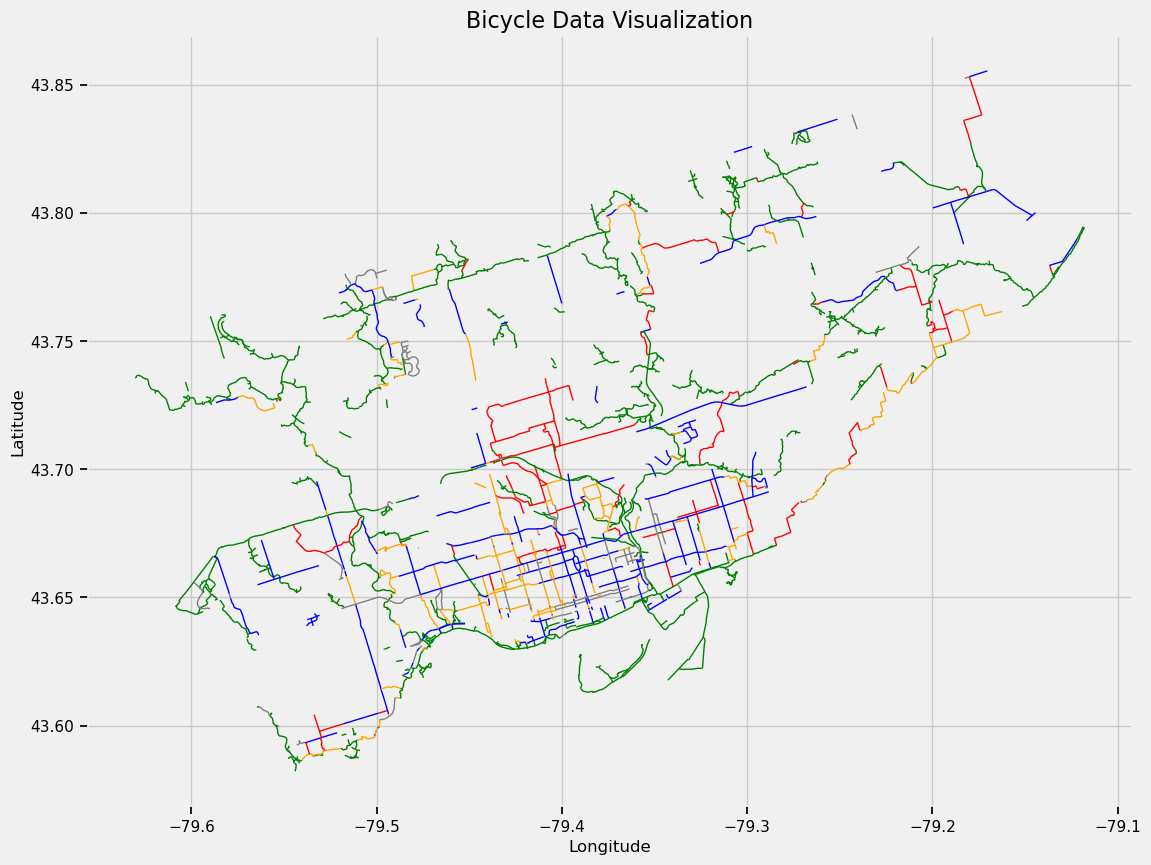

In [32]:
def map_color(bike_path_type):
    if bike_path_type == 'Signed Route (No Pavement Markings)':
        return 'red'
    elif bike_path_type in ['Sharrows', 'Sharrows - Wayfinding', 'Sharrows - Arterial - Connector', 'Sharrows - Arterial']:
        return 'orange'
    elif bike_path_type in ['Multi-Use Trail', 'Multi-Use Trail - Entrance', 'Multi-Use Trail - Boulevard',
                            'Multi-Use Trail - Existing Connector', 'Multi-Use Trail - Connector', 'Park Road']:
        return 'green'
    elif bike_path_type in ['Bike Lane', 'Cycle Track', 'Bike Lane - Buffered']:
        return 'blue'
    else:
        return 'gray'  # Default color for other trail types

# Assign colors to each bike path 
bicycle_data_color = bicycle_data.copy()

bicycle_data_color['color'] = bicycle_data['INFRA_LOWORDER'].apply(map_color)

# Create a plot
fig, ax = plt.subplots(figsize=(12, 12))
bicycle_data_color.plot(ax=ax, color=bicycle_data_color['color'], linewidth=1)

plt.title('Bicycle Data Visualization', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

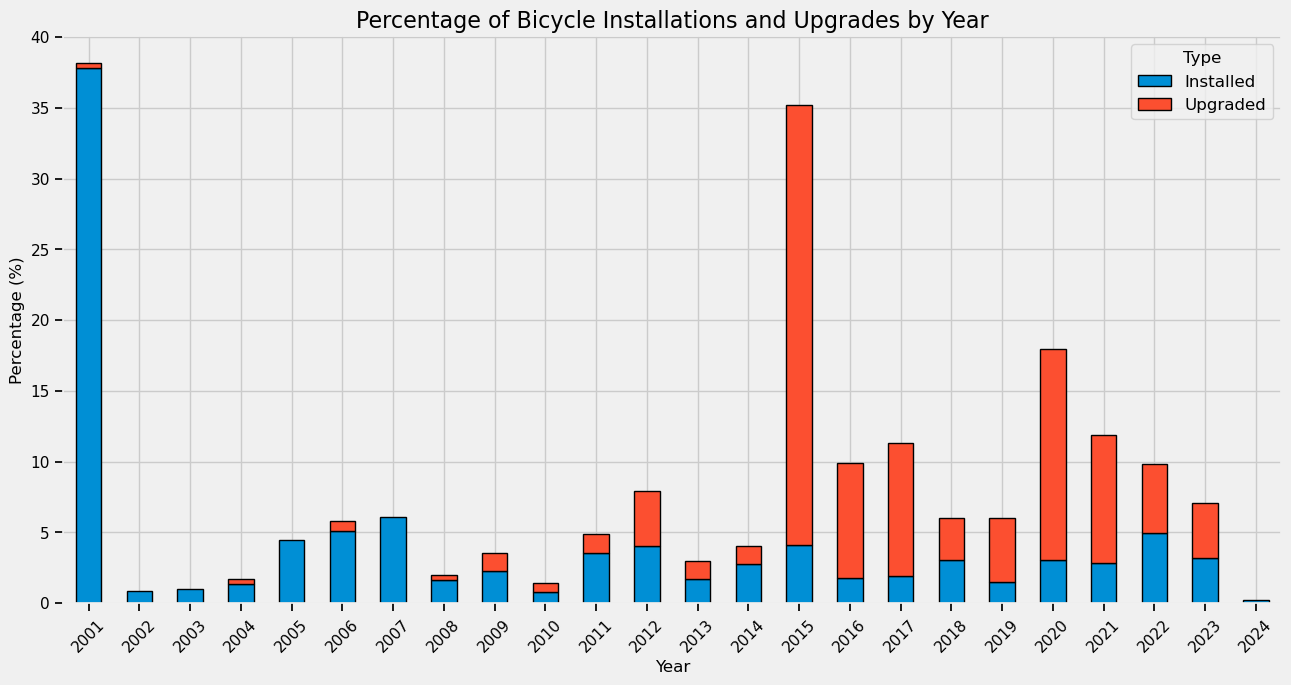

In [34]:
# Filter out UPGRADED years before 2001
filtered_upgraded = bicycle_data[bicycle_data['UPGRADED'] >= 2001]

# Calculate the percentage for INSTALLED years
installation_percentages = bicycle_data['INSTALLED'].value_counts(normalize=True) * 100

# Calculate the percentage for UPGRADED years
upgraded_percentages = filtered_upgraded['UPGRADED'].value_counts(normalize=True) * 100

# Combine the percentages into a single DataFrame
combined_percentages = pd.DataFrame({
    'Installed': installation_percentages,
    'Upgraded': upgraded_percentages
}).fillna(0) 

# Sort the years
combined_percentages = combined_percentages.sort_index()

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(14, 7))
combined_percentages.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')

plt.title('Percentage of Bicycle Installations and Upgrades by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Type', fontsize=12)
plt.show()

## Save as a GeoJson File

In [37]:
output_path = "../Clean Data/bicycle_data.geojson"
bicycle_data.to_file(output_path, driver="GeoJSON")

## Import City of Toronto Ward Shapefile

This dataset contains the City of Toronto ward boundaries in the WGS84 coordinate system. It has already been cleaned in a notebook at this path: New_Project_Directory/CME538_Big-Project_Hackstreet-Boys/Ward Data/Ward Data.ipynb. It is being imported from this path: CME538_Big-Project_Hackstreet-Boys/Clean Data/wards_data.geojson

In [43]:
# Path to the GeoJSON file
geojson_path = "../Clean Data/wards_data.geojson"

# Load the shapefile
wards_data = gpd.read_file(geojson_path)

# View geoDataFrame
wards_data.head()

WARD NUMBER            WARD NAME          WARD DISTRICT  \
0          01      Etobicoke North         Etobicoke York   
1          02     Etobicoke Centre         Etobicoke York   
2          03  Etobicoke-Lakeshore         Etobicoke York   
3          04   Parkdale-High Park  Toronto and East York   
4          05    York South-Weston         Etobicoke York   

                                            geometry  
0  POLYGON ((614361.91 4846443.252, 614376.274 48...  
1  POLYGON ((618769.981 4839786.381, 618770.007 4...  
2  POLYGON ((621184.054 4834315.989, 621213.577 4...  
3  POLYGON ((623660.782 4836061.188, 623724.263 4...  
4  POLYGON ((623361.036 4840391.392, 623364.743 4...

### Combine Bicycle and Ward Data Using Geospatial Relationships and Operations

First, we must ensure they are in the same coordinate Reference Systems (CRS) in Python / GeoPandas. First, lets see the CRS information for each file.

In [47]:
print (bicycle_data.crs)
print (wards_data.crs)

EPSG:4326
EPSG:32617


We will convert from EPSG:4326 (WGS 84, geographic coordinate system) to EPSG:32617 (UTM Zone 17N, projected coordinate system) because of the following reasons:

- EPSG:4326 uses latitude and longitude in decimal degrees but EPSG:32617 uses meters as units, which will be the ideal unit when we determine the zoning areas in each ward. It can accurately measure the areas of the polygons when we require it to. 
- EPSG:32617 is tailored for regions in UTM Zone 17N, which covers the City of Toronto.

In [50]:
# Convert CRS to EPSG:32617
bicycle_data = bicycle_data.to_crs("EPSG:32617")  
wards_data = wards_data.to_crs("EPSG:32617")

We will use spatial relationships and operation to assign a ward number to each bicyle network by checking which ward(s) it intersects or is contained within. 

In [53]:
# Perform the spatial join
bicycle_ward_data = gpd.sjoin(bicycle_data, wards_data[['WARD NAME', 'WARD NUMBER', 'WARD DISTRICT', 'geometry']], how="inner", predicate="intersects")


# Save or display the resulting GeoDataFrame
bicycle_ward_data.head()

_id  INSTALLED  UPGRADED                      STREET_NAME  \
0    1       2001      2021                      Kilbarry Rd   
1    2       2001      2009  Martin Goodman / Waterfront Trl   
2    3       2001      2011      Gatineau Hydro Corridor Trl   
3    4       2001      2011             G Ross Lord Park Trl   
4    5       2001      2012              Etobicoke Creek Trl   

               INFRA_LOWORDER             INFRA_HIGHORDER  \
0       Sharrows - Wayfinding       Sharrows - Wayfinding   
1             Multi-Use Trail             Multi-Use Trail   
2             Multi-Use Trail             Multi-Use Trail   
3             Multi-Use Trail             Multi-Use Trail   
4  Multi-Use Trail - Entrance  Multi-Use Trail - Entrance   

                                            geometry  index_right  \
0  MULTILINESTRING ((628651.515 4839265.273, 6286...           11   
1  MULTILINESTRING ((628769.688 4832571.759, 6287...            9   
2  MULTILINESTRING ((638882.149 4844617.068, 6388...           20   
3  MULTILINESTRING ((623319.222 4847699.258, 6233...            5   
4  MULTILINESTRING ((617202.25 4827390.434, 61720...            2   

             WARD NAME WARD NUMBER          WARD DISTRICT  
0   Toronto-St. Paul's          12  Toronto and East York  
1    Spadina-Fort York          10  Toronto and East York  
2   Scarborough Centre          21            Scarborough  
3          York Centre          06             North York  
4  Etobicoke-Lakeshore          03         Etobicoke York

We will move the geometry column to the end and drop index_right. 

In [67]:
# Move geometry column to the end
columns = [col for col in bicycle_ward_data.columns if col != "geometry"] + ["geometry"]
bicycle_ward_data = bicycle_ward_data[columns]

# Drop index_right
bicycle_ward_data = bicycle_ward_data.drop(columns=['index_right'])

# Display the result
bicycle_ward_data.head(10)

_id  INSTALLED  UPGRADED                      STREET_NAME  \
0    1       2001      2021                      Kilbarry Rd   
1    2       2001      2009  Martin Goodman / Waterfront Trl   
2    3       2001      2011      Gatineau Hydro Corridor Trl   
3    4       2001      2011             G Ross Lord Park Trl   
4    5       2001      2012              Etobicoke Creek Trl   
5    6       2001      2012            Marie Curtis Park Trl   
6    7       2001      2012               West Don River Trl   
6    7       2001      2012               West Don River Trl   
7    8       2001      2021                       Bloor St E   
7    8       2001      2021                       Bloor St E   

               INFRA_LOWORDER             INFRA_HIGHORDER  \
0       Sharrows - Wayfinding       Sharrows - Wayfinding   
1             Multi-Use Trail             Multi-Use Trail   
2             Multi-Use Trail             Multi-Use Trail   
3             Multi-Use Trail             Multi-Use Trail   
4  Multi-Use Trail - Entrance  Multi-Use Trail - Entrance   
5             Multi-Use Trail             Multi-Use Trail   
6             Multi-Use Trail             Multi-Use Trail   
6             Multi-Use Trail             Multi-Use Trail   
7                 Cycle Track                 Cycle Track   
7                 Cycle Track                 Cycle Track   

             WARD NAME WARD NUMBER          WARD DISTRICT  \
0   Toronto-St. Paul's          12  Toronto and East York   
1    Spadina-Fort York          10  Toronto and East York   
2   Scarborough Centre          21            Scarborough   
3          York Centre          06             North York   
4  Etobicoke-Lakeshore          03         Etobicoke York   
5  Etobicoke-Lakeshore          03         Etobicoke York   
6      Don Valley West          15             North York   
6      Don Valley East          16             North York   
7  University-Rosedale          11  Toronto and East York   
7       Toronto Centre          13  Toronto and East York   

                                            geometry  
0  MULTILINESTRING ((628651.515 4839265.273, 6286...  
1  MULTILINESTRING ((628769.688 4832571.759, 6287...  
2  MULTILINESTRING ((638882.149 4844617.068, 6388...  
3  MULTILINESTRING ((623319.222 4847699.258, 6233...  
4  MULTILINESTRING ((617202.25 4827390.434, 61720...  
5  MULTILINESTRING ((617617.274 4827029.819, 6176...  
6  MULTILINESTRING ((634105.995 4840457.885, 6341...  
6  MULTILINESTRING ((634105.995 4840457.885, 6341...  
7  MULTILINESTRING ((631303.339 4836720.698, 6313...  
7  MULTILINESTRING ((631303.339 4836720.698, 6313...

In [59]:
bicycle_ward_data.shape

(1608, 10)

It is noted that for some bicycle networks, more than one ward is intersected. Therefore, an additional row is added for each additional ward intersected. See id 7, the bicycle network intersects both ward 15 and 16.

In [61]:
bicycle_ward_data.isnull().sum()

_id                0
INSTALLED          0
UPGRADED           0
STREET_NAME        0
INFRA_LOWORDER     0
INFRA_HIGHORDER    0
WARD NAME          0
WARD NUMBER        0
WARD DISTRICT      0
geometry           0
dtype: int64

There are no null values to be investigated in the new combined dataset. 

## EDA

In [ ]:
## ADD A DESCRIPTION

In [80]:
# Create a style function to assign different colours to different cycling infrastructure

##########################################################################################################################################################
def style_function(feature):
    # Access the trail type from the feature's properties
    bike_path_type = feature['properties']['INFRA_LOWORDER']  

    # Set color based on the trail type
    if bike_path_type == 'Signed Route (No Pavement Markings)':
        color = 'red'
    elif bike_path_type in ['Sharrows', 'Sharrows - Wayfinding', 'Sharrows - Arterial - Connector', 'Sharrows - Arterial']:
        color = 'orange'
    elif bike_path_type in ['Multi-Use Trail', 'Multi-Use Trail - Entrance', 'Multi-Use Trail - Boulevard', 'Multi-Use Trail - Existing Connector', 'Multi-Use Trail - Connector', 'Park Road']:
        color = 'green'
    elif bike_path_type in ['Bike Lane', 'Cycle Track', 'Bike Lane - Buffered']:
        color = 'blue'
    else:
        color = 'gray'  # Default color for other trail types

    return {
        'fillColor': color,  # Fill color for polygons (or lines)
        'color': color,      # Border color for polygons (or lines)
        'weight': 2,         # Border thickness
        'fillOpacity': 0.5   # Transparency of the fill color (if a polygon)
    }

##########################################################################################################################################################
# Define a style function for the polygons (area boundaries)
def area_style_function(feature):
    return {
        'fillColor': 'grey',  # Fill color of the polygon
        'color': 'black',             # Boundary (border) color (e.g., red)
        'weight': 1,                # Boundary (border) thickness (e.g., 5)
        'opacity': 0.5,               # Boundary opacity (e.g., fully opaque)
        'fillOpacity': 0.4          # Fill opacity (e.g., 40% opacity for fill)
    }
##########################################################################################################################################################

In [82]:
# Create a map of Toronto
bike_lane_network = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=11)

# Overlay the ward boundaries on to the map of Toronto
folium.GeoJson(
    wards_data,
    style_function=area_style_function
).add_to(bike_lane_network)

# Overlay the bike lanes on to the map of Toronto
folium.GeoJson(
    bicycle_data,  
    style_function=style_function  
).add_to(bike_lane_network)

# Display map
bike_lane_network

In [86]:
## ADD A LEGEND, USE THIS TO HELP AS A MARKDOWN

### Zoning Legend

- **Residential**: 🟥 Red
- **Open Space**: 🟩 Green
- **Utility and Transportation**: 🟦 Blue
- **Employment Industrial**: 🟧 Orange
- **Institutional**: 🟪 Purple
- **Commercial Residential Employment**: 🟨 Yellow
- **Residential Apartment**: 🟦 Cyan
- **Commercial**: 🟪 Magenta
- **Commercial Residential**: 🟫 Brown

SyntaxError: invalid character '🟥' (U+1F7E5) (3536547824.py, line 5)

In [89]:
## ANDREW TO PUT IN THE REST